In [1]:
import sys
from PyQt5.QtWidgets import QApplication
from kiwoom_api.api import Kiwoom, DataFeeder, Executor

In [2]:
app = QApplication(sys.argv)

kiwoom = Kiwoom() # Kiwoom 인스턴스 생성
kiwoom.commConnect() # API 접속
feeder = DataFeeder(kiwoom)

2020-06-12 13:47:03.153416 Connection Successful


In [3]:
import pandas as pd
import time

In [4]:
Kospi_codes = pd.read_csv('./KOSPI200.csv', header=None)
Kospi_codes.columns = ['codes', 'name']

In [5]:
print('%06d' % Kospi_codes[Kospi_codes.iloc[:, 1] == '삼성전자'].codes)

005930


In [6]:
t = 43
codes = kiwoom.codes

In [7]:
name = kiwoom.dynamicCall('GetMasterCodeName("{}")'.format(codes[t]))

In [8]:
name, codes[t]

('영풍', '000670')

In [10]:
def min_request(trCode, n, **kwargs):   
    for k, v in kwargs.items():
        kiwoom.setInputValue(k, v)

    kiwoom.commRqData('주식분봉차트조회요청', trCode, n, "0000")
    return getattr(kiwoom, trCode)

In [15]:
params = {"종목코드": "000670", "틱범위":1, "수정주가구분" : "1"}
q = min_request(trCode="OPT10080", n=0, **params)

2020-06-12 13:15:06.303957  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:15:09.206188',
 'TR_CODE': 'OPT10080'}


In [18]:
q['멀티데이터'][-1]['체결시간'] == '20200609150800'

True

In [11]:
def get_min_data(code, n): #n : 몇번 가져올 것인가? 1회 900개
    params = {"종목코드": code, "틱범위":1, "수정주가구분" : "1"}
    
    data = []
    last_date = None
    
    for i in range(n):
        time.sleep(0.3)

        if i == 0:
            tmp_data = min_request(trCode="OPT10080", n=0, **params)
        else:
            tmp_data = min_request(trCode="OPT10080", n=2, **params)
                
        if tmp_data['멀티데이터'][-1]['체결시간'] != last_date:
            print(last_date)
            data.append(tmp_data)
            last_date = tmp_data['멀티데이터'][-1]['체결시간']
        else:
            print(code, " 마지막 i=",i)
            break
        
    tmp = pd.DataFrame(data[0]['멀티데이터'])

    for i in range(1, len(data)):
        tmp = tmp.append(pd.DataFrame(data[i]['멀티데이터']))

    tmp = tmp.reset_index(drop=True).loc[:, ["체결시간", "현재가", "시가", "고가", "저가", "거래량"]]
        
    return tmp

In [12]:
def get_min_data_from_codes():
    for i in range(len(Kospi_codes)):
        code = '%06d' % Kospi_codes.iloc[i, 1]
        min_data = get_min_data(code, 3)
        min_data.to_csv('{}_{}_.csv')

In [29]:
tmp = get_min_data("005930", 5)

2020-06-12 13:18:31.615525  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:18:31.934695',
 'TR_CODE': 'OPT10080'}


None


2020-06-12 13:18:32.351557  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:18:32.664749',
 'TR_CODE': 'OPT10080'}


20200610110300


2020-06-12 13:18:33.081657  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:18:33.394790',
 'TR_CODE': 'OPT10080'}


20200605150900


2020-06-12 13:18:33.812648  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:18:34.195654',
 'TR_CODE': 'OPT10080'}


20200603125300


2020-06-12 13:18:34.610657  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:18:35.009473',
 'TR_CODE': 'OPT10080'}


20200601103700


In [19]:
Kospi_codes.iloc[[0,19],:]

,codes,name
0,5930,삼성전자
19,18260,삼성에스디에스


In [20]:
for idx, code, name in Kospi_codes.iloc[[0,19],:].itertuples():
    code = '%06d' % code
    print(idx, code, name)
    min_data = get_min_data(code, 200)
    min_data.to_csv('./min_data/{}_{}_.csv'.format(name, code))
    time.sleep(1)

0 005930 삼성전자


2020-06-12 13:48:54.668795  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:48:56.972633',
 'TR_CODE': 'OPT10080'}


None


2020-06-12 13:48:57.391491  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:48:57.720602',
 'TR_CODE': 'OPT10080'}


20200610113300


2020-06-12 13:48:58.136491  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:48:58.499547',
 'TR_CODE': 'OPT10080'}


20200608091700


2020-06-12 13:48:58.916406  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:48:59.232589',
 'TR_CODE': 'OPT10080'}


20200603132300


2020-06-12 13:48:59.648491  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:48:59.978595',
 'TR_CODE': 'OPT10080'}


20200601110700


2020-06-12 13:49:00.394452  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:00.749501',
 'TR_CODE': 'OPT10080'}


20200527151300


2020-06-12 13:49:01.164392  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:01.523432',
 'TR_CODE': 'OPT10080'}


20200525125700


2020-06-12 13:49:01.939322  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:02.269437',
 'TR_CODE': 'OPT10080'}


20200521104100


2020-06-12 13:49:02.688334  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:03.046361',
 'TR_CODE': 'OPT10080'}


20200518144700


2020-06-12 13:49:03.465242  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:03.793387',
 'TR_CODE': 'OPT10080'}


20200514123100


2020-06-12 13:49:04.209249  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:04.535407',
 'TR_CODE': 'OPT10080'}


20200512101500


2020-06-12 13:49:04.951268  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:05.293350',
 'TR_CODE': 'OPT10080'}


20200507142100


2020-06-12 13:49:05.709332  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:06.086231',
 'TR_CODE': 'OPT10080'}


20200504120500


2020-06-12 13:49:06.501121  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:06.848193',
 'TR_CODE': 'OPT10080'}


20200428094900


2020-06-12 13:49:07.264118  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:07.623145',
 'TR_CODE': 'OPT10080'}


20200423135500


2020-06-12 13:49:08.043994  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:08.409019',
 'TR_CODE': 'OPT10080'}


20200421113900


2020-06-12 13:49:08.824905  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:09.200901',
 'TR_CODE': 'OPT10080'}


20200417092300


2020-06-12 13:49:09.615792  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:09.980840',
 'TR_CODE': 'OPT10080'}


20200413132900


2020-06-12 13:49:10.397729  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:10.730835',
 'TR_CODE': 'OPT10080'}


20200409111300


2020-06-12 13:49:11.147721  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:11.470860',
 'TR_CODE': 'OPT10080'}


20200406151900


2020-06-12 13:49:11.886718  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:12.261717',
 'TR_CODE': 'OPT10080'}


20200402130300


2020-06-12 13:49:12.681594  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:13.037640',
 'TR_CODE': 'OPT10080'}


20200331104700


2020-06-12 13:49:13.453538  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:13.778689',
 'TR_CODE': 'OPT10080'}


20200326145300


2020-06-12 13:49:14.193548  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:14.507707',
 'TR_CODE': 'OPT10080'}


20200324123700


2020-06-12 13:49:14.924593  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:15.268674',
 'TR_CODE': 'OPT10080'}


20200320102100


2020-06-12 13:49:15.684592  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:16.009692',
 'TR_CODE': 'OPT10080'}


20200317135800


2020-06-12 13:49:16.426576  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:16.760714',
 'TR_CODE': 'OPT10080'}


20200313114200


2020-06-12 13:49:17.176623  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:17.487738',
 'TR_CODE': 'OPT10080'}


20200310151800


2020-06-12 13:49:17.903626  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:18.227759',
 'TR_CODE': 'OPT10080'}


20200306130200


2020-06-12 13:49:18.642656  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:18.953844',
 'TR_CODE': 'OPT10080'}


20200304104600


2020-06-12 13:49:19.368759  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:19.695832',
 'TR_CODE': 'OPT10080'}


20200228145200


2020-06-12 13:49:20.112720  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:20.473784',
 'TR_CODE': 'OPT10080'}


20200226123600


2020-06-12 13:49:20.890638  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:21.206824',
 'TR_CODE': 'OPT10080'}


20200224102000


2020-06-12 13:49:21.622714  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:21.950833',
 'TR_CODE': 'OPT10080'}


20200219142600


2020-06-12 13:49:22.370680  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:22.713763',
 'TR_CODE': 'OPT10080'}


20200217121000


2020-06-12 13:49:23.128695  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:23.458770',
 'TR_CODE': 'OPT10080'}


20200213095400


2020-06-12 13:49:23.873662  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:24.193804',
 'TR_CODE': 'OPT10080'}


20200210140000


2020-06-12 13:49:24.608758  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:24.969730',
 'TR_CODE': 'OPT10080'}


20200206114400


2020-06-12 13:49:25.384620  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:25.717730',
 'TR_CODE': 'OPT10080'}


20200204092800


2020-06-12 13:49:26.133617  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:26.478695',
 'TR_CODE': 'OPT10080'}


20200130133400


2020-06-12 13:49:26.894584  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:27.210767',
 'TR_CODE': 'OPT10080'}


20200128111800


2020-06-12 13:49:27.625668  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:27.969707',
 'TR_CODE': 'OPT10080'}


20200122090200


2020-06-12 13:49:28.386592  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:28.747628',
 'TR_CODE': 'OPT10080'}


20200117130800


2020-06-12 13:49:29.164519  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:29.508592',
 'TR_CODE': 'OPT10080'}


20200115105200


2020-06-12 13:49:29.925478  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:30.273545',
 'TR_CODE': 'OPT10080'}


20200110145800


2020-06-12 13:49:30.689435  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:31.130254',
 'TR_CODE': 'OPT10080'}


20200108124200


2020-06-12 13:49:31.548168  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:31.879252',
 'TR_CODE': 'OPT10080'}


20200106102600


2020-06-12 13:49:32.294210  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:32.624286',
 'TR_CODE': 'OPT10080'}


20191230133200


2020-06-12 13:49:33.039153  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:33.394200',
 'TR_CODE': 'OPT10080'}


20191226111600


2020-06-12 13:49:33.810090  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:34.189073',
 'TR_CODE': 'OPT10080'}


20191223090000


2020-06-12 13:49:34.604973  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:34.951038',
 'TR_CODE': 'OPT10080'}


20191218130600


2020-06-12 13:49:35.369920  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:35.741952',
 'TR_CODE': 'OPT10080'}


20191216105000


2020-06-12 13:49:36.158833  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:36.505879',
 'TR_CODE': 'OPT10080'}


20191211145600


2020-06-12 13:49:36.919878  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:37.265847',
 'TR_CODE': 'OPT10080'}


20191209124000


2020-06-12 13:49:37.684795  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:38.038778',
 'TR_CODE': 'OPT10080'}


20191205102400


2020-06-12 13:49:38.454668  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:38.794767',
 'TR_CODE': 'OPT10080'}


20191202143000


2020-06-12 13:49:39.213638  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:39.560708',
 'TR_CODE': 'OPT10080'}


20191128121400


2020-06-12 13:49:39.976601  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:40.323669',
 'TR_CODE': 'OPT10080'}


20191126095800


2020-06-12 13:49:40.739558  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:41.073663',
 'TR_CODE': 'OPT10080'}


20191121140400


2020-06-12 13:49:41.488554  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:41.904444',
 'TR_CODE': 'OPT10080'}


20191119114800


2020-06-12 13:49:42.322324  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:42.681363',
 'TR_CODE': 'OPT10080'}


20191115093200


2020-06-12 13:49:43.099277  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:43.471251',
 'TR_CODE': 'OPT10080'}


20191112133800


2020-06-12 13:49:43.888220  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:44.241224',
 'TR_CODE': 'OPT10080'}


20191108112200


2020-06-12 13:49:44.657081  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:44.997169',
 'TR_CODE': 'OPT10080'}


20191106090600


2020-06-12 13:49:45.414056  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:45.756167',
 'TR_CODE': 'OPT10080'}


20191101131200


2020-06-12 13:49:46.172047  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:46.516140',
 'TR_CODE': 'OPT10080'}


20191030105600


2020-06-12 13:49:46.932081  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:47.281149',
 'TR_CODE': 'OPT10080'}


20191025150200


2020-06-12 13:49:47.698203  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:48.044132',
 'TR_CODE': 'OPT10080'}


20191023124600


2020-06-12 13:49:48.460019  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:48.779196',
 'TR_CODE': 'OPT10080'}


20191021103000


2020-06-12 13:49:49.194230  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:49.517387',
 'TR_CODE': 'OPT10080'}


20191016143600


2020-06-12 13:49:49.933296  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:50.262395',
 'TR_CODE': 'OPT10080'}


20191014122000


2020-06-12 13:49:50.678286  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:51.007377',
 'TR_CODE': 'OPT10080'}


20191010100400


2020-06-12 13:49:51.423372  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:51.756406',
 'TR_CODE': 'OPT10080'}


20191004141000


2020-06-12 13:49:52.172262  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:52.502380',
 'TR_CODE': 'OPT10080'}


20191001115400


2020-06-12 13:49:52.918268  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:53.278307',
 'TR_CODE': 'OPT10080'}


20190927093800


2020-06-12 13:49:53.693200  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:54.033303',
 'TR_CODE': 'OPT10080'}


20190924134400


2020-06-12 13:49:54.450172  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:54.796246',
 'TR_CODE': 'OPT10080'}


20190920112800


2020-06-12 13:49:55.216124  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:55.563194',
 'TR_CODE': 'OPT10080'}


20190918091200


2020-06-12 13:49:55.982074  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:56.338153',
 'TR_CODE': 'OPT10080'}


20190911131800


2020-06-12 13:49:56.757003  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:57.116067',
 'TR_CODE': 'OPT10080'}


20190909110200


2020-06-12 13:49:57.531930  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:57.881024',
 'TR_CODE': 'OPT10080'}


20190904150800


2020-06-12 13:49:58.296914  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:58.637029',
 'TR_CODE': 'OPT10080'}


20190902125200


2020-06-12 13:49:59.051893  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:49:59.416948',
 'TR_CODE': 'OPT10080'}


20190829103600


2020-06-12 13:49:59.833804  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:00.204811',
 'TR_CODE': 'OPT10080'}


20190826144200


2020-06-12 13:50:00.618703  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:00.964804',
 'TR_CODE': 'OPT10080'}


20190822122600


2020-06-12 13:50:01.380794  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:01.728734',
 'TR_CODE': 'OPT10080'}


20190820101000


2020-06-12 13:50:02.144677  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:02.508675',
 'TR_CODE': 'OPT10080'}


20190814141600


2020-06-12 13:50:02.926531  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:03.286569',
 'TR_CODE': 'OPT10080'}


20190812120000


2020-06-12 13:50:03.702603  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:04.035596',
 'TR_CODE': 'OPT10080'}


20190808094400


2020-06-12 13:50:04.451604  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:04.787555',
 'TR_CODE': 'OPT10080'}


20190805135000


2020-06-12 13:50:05.202445  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:05.555501',
 'TR_CODE': 'OPT10080'}


20190801113400


2020-06-12 13:50:05.971389  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:06.304530',
 'TR_CODE': 'OPT10080'}


20190730091800


2020-06-12 13:50:06.723377  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:07.060475',
 'TR_CODE': 'OPT10080'}


20190725132400


2020-06-12 13:50:07.477361  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:07.839393',
 'TR_CODE': 'OPT10080'}


20190723110800


2020-06-12 13:50:08.255280  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:08.591382',
 'TR_CODE': 'OPT10080'}


20190718151400


2020-06-12 13:50:09.006274  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:09.348358',
 'TR_CODE': 'OPT10080'}


20190716125800


2020-06-12 13:50:09.763247  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:10.109322',
 'TR_CODE': 'OPT10080'}


20190712104200


2020-06-12 13:50:10.525274  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:10.850340',
 'TR_CODE': 'OPT10080'}


20190709144800


2020-06-12 13:50:11.266230  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:11.636238',
 'TR_CODE': 'OPT10080'}


20190705123200


2020-06-12 13:50:12.052127  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:12.401194',
 'TR_CODE': 'OPT10080'}


20190703101600


2020-06-12 13:50:12.817083  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:13.187091',
 'TR_CODE': 'OPT10080'}


20190628142200


2020-06-12 13:50:13.604150  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:13.938256',
 'TR_CODE': 'OPT10080'}


20190626120600


2020-06-12 13:50:14.351152  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:14.686258',
 'TR_CODE': 'OPT10080'}


20190624095000


2020-06-12 13:50:15.102174  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:15.450212',
 'TR_CODE': 'OPT10080'}


20190619135600


2020-06-12 13:50:15.864107  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:16.209181',
 'TR_CODE': 'OPT10080'}


20190617114000


2020-06-12 13:50:16.625173  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:16.959177',
 'TR_CODE': 'OPT10080'}


20190613092400


2020-06-12 13:50:17.377086  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:17.711197',
 'TR_CODE': 'OPT10080'}


20190610133000


2020-06-12 13:50:18.128052  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:18.447198',
 'TR_CODE': 'OPT10080'}


20190605111400


2020-06-12 13:50:18.863086  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:19.187244',
 'TR_CODE': 'OPT10080'}


005930  마지막 i= 108
19 018260 삼성에스디에스


2020-06-12 13:50:22.278093  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:22.625184',
 'TR_CODE': 'OPT10080'}


None


2020-06-12 13:50:23.041067  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:23.433991',
 'TR_CODE': 'OPT10080'}


20200610113500


2020-06-12 13:50:23.849909  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:24.222907',
 'TR_CODE': 'OPT10080'}


20200608091900


2020-06-12 13:50:24.639797  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:25.271078',
 'TR_CODE': 'OPT10080'}


20200603132500


2020-06-12 13:50:25.686966  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:26.079915',
 'TR_CODE': 'OPT10080'}


20200601110900


2020-06-12 13:50:26.496799  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:26.834926',
 'TR_CODE': 'OPT10080'}


20200527151500


2020-06-12 13:50:27.253811  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:27.726510',
 'TR_CODE': 'OPT10080'}


20200525125900


2020-06-12 13:50:28.142402  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:28.522406',
 'TR_CODE': 'OPT10080'}


20200521104300


2020-06-12 13:50:28.938269  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:29.315261',
 'TR_CODE': 'OPT10080'}


20200518144900


2020-06-12 13:50:29.730154  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:30.087213',
 'TR_CODE': 'OPT10080'}


20200514123300


2020-06-12 13:50:30.503120  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:30.864120',
 'TR_CODE': 'OPT10080'}


20200512101700


2020-06-12 13:50:31.280024  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:31.618104',
 'TR_CODE': 'OPT10080'}


20200507142300


2020-06-12 13:50:32.033990  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:32.393030',
 'TR_CODE': 'OPT10080'}


20200504120700


2020-06-12 13:50:32.810921  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:33.214832',
 'TR_CODE': 'OPT10080'}


20200428095100


2020-06-12 13:50:33.630723  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:33.989791',
 'TR_CODE': 'OPT10080'}


20200423135700


2020-06-12 13:50:34.405648  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:34.766683',
 'TR_CODE': 'OPT10080'}


20200421114100


2020-06-12 13:50:35.182603  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:35.559588',
 'TR_CODE': 'OPT10080'}


20200417092500


2020-06-12 13:50:35.976447  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:36.382388',
 'TR_CODE': 'OPT10080'}


20200413133100


2020-06-12 13:50:36.799249  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:37.209151',
 'TR_CODE': 'OPT10080'}


20200409111500


2020-06-12 13:50:37.625070  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:37.948174',
 'TR_CODE': 'OPT10080'}


20200406153500


2020-06-12 13:50:38.363065  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:38.707146',
 'TR_CODE': 'OPT10080'}


20200402130500


2020-06-12 13:50:39.123033  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:39.464121',
 'TR_CODE': 'OPT10080'}


20200331104900


2020-06-12 13:50:39.881041  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:40.258994',
 'TR_CODE': 'OPT10080'}


20200326145500


2020-06-12 13:50:40.675881  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:41.005031',
 'TR_CODE': 'OPT10080'}


20200324123900


2020-06-12 13:50:41.419890  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:41.752003',
 'TR_CODE': 'OPT10080'}


20200320102300


2020-06-12 13:50:42.169886  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:42.510972',
 'TR_CODE': 'OPT10080'}


20200317135900


2020-06-12 13:50:42.927857  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:43.277923',
 'TR_CODE': 'OPT10080'}


20200313114300


2020-06-12 13:50:43.692825  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:44.046865',
 'TR_CODE': 'OPT10080'}


20200310151800


2020-06-12 13:50:44.463756  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:44.785888',
 'TR_CODE': 'OPT10080'}


20200306130200


2020-06-12 13:50:45.200782  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:45.618692',
 'TR_CODE': 'OPT10080'}


20200304104600


2020-06-12 13:50:46.035548  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:46.416565',
 'TR_CODE': 'OPT10080'}


20200228145200


2020-06-12 13:50:46.834410  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:47.238331',
 'TR_CODE': 'OPT10080'}


20200226123600


2020-06-12 13:50:47.655247  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:48.028217',
 'TR_CODE': 'OPT10080'}


20200224102000


2020-06-12 13:50:48.444136  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:48.784231',
 'TR_CODE': 'OPT10080'}


20200219142300


2020-06-12 13:50:49.201092  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:49.544165',
 'TR_CODE': 'OPT10080'}


20200217120600


2020-06-12 13:50:49.962047  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:50.353000',
 'TR_CODE': 'OPT10080'}


20200213094500


2020-06-12 13:50:50.770902  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:51.172809',
 'TR_CODE': 'OPT10080'}


20200210135100


2020-06-12 13:50:51.589694  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:51.963724',
 'TR_CODE': 'OPT10080'}


20200206113300


2020-06-12 13:50:52.379581  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:52.739618',
 'TR_CODE': 'OPT10080'}


20200204091700


2020-06-12 13:50:53.155507  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:53.556438',
 'TR_CODE': 'OPT10080'}


20200130132300


2020-06-12 13:50:53.973320  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:54.333382',
 'TR_CODE': 'OPT10080'}


20200128110700


2020-06-12 13:50:54.750240  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:55.122247',
 'TR_CODE': 'OPT10080'}


20200121151100


2020-06-12 13:50:55.539168  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:55.873264',
 'TR_CODE': 'OPT10080'}


20200117125500


2020-06-12 13:50:56.290122  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:56.645204',
 'TR_CODE': 'OPT10080'}


20200115103900


2020-06-12 13:50:57.062059  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:57.463017',
 'TR_CODE': 'OPT10080'}


20200110144100


2020-06-12 13:50:57.878876  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:58.237945',
 'TR_CODE': 'OPT10080'}


20200108122300


2020-06-12 13:50:58.656922  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:59.021846',
 'TR_CODE': 'OPT10080'}


20200106095700


2020-06-12 13:50:59.435710  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:50:59.773840',
 'TR_CODE': 'OPT10080'}


20191230124400


2020-06-12 13:51:00.189695  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:00.512830',
 'TR_CODE': 'OPT10080'}


20191226102600


2020-06-12 13:51:00.926723  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:01.255873',
 'TR_CODE': 'OPT10080'}


20191220142400


2020-06-12 13:51:01.672728  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:02.010856',
 'TR_CODE': 'OPT10080'}


20191218120400


2020-06-12 13:51:02.426713  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:02.730899',
 'TR_CODE': 'OPT10080'}


20191216094400


2020-06-12 13:51:03.145789  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:03.454963',
 'TR_CODE': 'OPT10080'}


20191211134400


2020-06-12 13:51:03.869879  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:04.183015',
 'TR_CODE': 'OPT10080'}


20191209111500


2020-06-12 13:51:04.598904  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:04.924034',
 'TR_CODE': 'OPT10080'}


20191204145900


2020-06-12 13:51:05.340920  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:05.705942',
 'TR_CODE': 'OPT10080'}


20191202123100


2020-06-12 13:51:06.121859  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:06.463946',
 'TR_CODE': 'OPT10080'}


20191128095400


2020-06-12 13:51:06.877808  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:07.190972',
 'TR_CODE': 'OPT10080'}


20191125134600


2020-06-12 13:51:07.610858  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:07.979861',
 'TR_CODE': 'OPT10080'}


20191121112900


2020-06-12 13:51:08.397786  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:08.933313',
 'TR_CODE': 'OPT10080'}


20191119091200


2020-06-12 13:51:09.350198  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:09.791017',
 'TR_CODE': 'OPT10080'}


20191114141700


2020-06-12 13:51:10.208901  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:10.612820',
 'TR_CODE': 'OPT10080'}


20191112110000


2020-06-12 13:51:11.028707  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:11.400712',
 'TR_CODE': 'OPT10080'}


20191107150000


2020-06-12 13:51:11.816606  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:12.130761',
 'TR_CODE': 'OPT10080'}


20191105124400


2020-06-12 13:51:12.545687  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:12.911673',
 'TR_CODE': 'OPT10080'}


20191101102800


2020-06-12 13:51:13.325674  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:13.704553',
 'TR_CODE': 'OPT10080'}


20191029143000


2020-06-12 13:51:14.119442  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:14.500453',
 'TR_CODE': 'OPT10080'}


20191025121400


2020-06-12 13:51:14.917308  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:15.308262',
 'TR_CODE': 'OPT10080'}


20191023095800


2020-06-12 13:51:15.722158  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:16.032327',
 'TR_CODE': 'OPT10080'}


20191018135800


2020-06-12 13:51:16.449305  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:16.794384',
 'TR_CODE': 'OPT10080'}


20191016111700


2020-06-12 13:51:17.209262  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:17.585272',
 'TR_CODE': 'OPT10080'}


20191011151000


2020-06-12 13:51:18.003124  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:18.368149',
 'TR_CODE': 'OPT10080'}


20191008125200


2020-06-12 13:51:18.783125  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:19.128116',
 'TR_CODE': 'OPT10080'}


20191004102600


2020-06-12 13:51:19.545001  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:19.902070',
 'TR_CODE': 'OPT10080'}


20190930142300


2020-06-12 13:51:20.318967  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:20.686971',
 'TR_CODE': 'OPT10080'}


20190926115900


2020-06-12 13:51:21.105826  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:21.505766',
 'TR_CODE': 'OPT10080'}


20190924092900


2020-06-12 13:51:21.923641  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:22.309606',
 'TR_CODE': 'OPT10080'}


20190919133100


2020-06-12 13:51:22.725494  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:23.052621',
 'TR_CODE': 'OPT10080'}


20190917111300


2020-06-12 13:51:23.468508  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:23.828546',
 'TR_CODE': 'OPT10080'}


20190910151700


2020-06-12 13:51:24.243437  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:24.660347',
 'TR_CODE': 'OPT10080'}


20190906130000


2020-06-12 13:51:25.075218  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:25.408319',
 'TR_CODE': 'OPT10080'}


20190904104100


2020-06-12 13:51:25.823212  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:26.168312',
 'TR_CODE': 'OPT10080'}


20190830144600


2020-06-12 13:51:26.583209  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:26.900361',
 'TR_CODE': 'OPT10080'}


20190828122800


2020-06-12 13:51:27.316254  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:27.697200',
 'TR_CODE': 'OPT10080'}


20190826100000


2020-06-12 13:51:28.114086  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:28.466143',
 'TR_CODE': 'OPT10080'}


20190821140400


2020-06-12 13:51:28.883040  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:29.295924',
 'TR_CODE': 'OPT10080'}


20190819113900


2020-06-12 13:51:29.710826  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:30.096784',
 'TR_CODE': 'OPT10080'}


20190814091500


2020-06-12 13:51:30.512694  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:30.871728',
 'TR_CODE': 'OPT10080'}


20190809131000


2020-06-12 13:51:31.287633  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:31.631705',
 'TR_CODE': 'OPT10080'}


20190807105300


2020-06-12 13:51:32.045572  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:32.410625',
 'TR_CODE': 'OPT10080'}


20190802145900


2020-06-12 13:51:32.827514  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:33.189512',
 'TR_CODE': 'OPT10080'}


20190731124300


2020-06-12 13:51:33.605432  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:33.988406',
 'TR_CODE': 'OPT10080'}


20190729102400


2020-06-12 13:51:34.404298  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:34.749338',
 'TR_CODE': 'OPT10080'}


20190724142500


2020-06-12 13:51:35.165226  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:35.850395',
 'TR_CODE': 'OPT10080'}


20190722120500


2020-06-12 13:51:36.265287  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:36.663223',
 'TR_CODE': 'OPT10080'}


20190718092000


2020-06-12 13:51:37.079262  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:37.431194',
 'TR_CODE': 'OPT10080'}


20190715132300


2020-06-12 13:51:37.846106  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:38.169195',
 'TR_CODE': 'OPT10080'}


20190711105500


2020-06-12 13:51:38.583089  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:38.935173',
 'TR_CODE': 'OPT10080'}


20190708145700


2020-06-12 13:51:39.349038  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:39.727054',
 'TR_CODE': 'OPT10080'}


20190704124000


2020-06-12 13:51:40.144911  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:40.511955',
 'TR_CODE': 'OPT10080'}


20190702102100


2020-06-12 13:51:40.925824  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:41.284863',
 'TR_CODE': 'OPT10080'}


20190627142500


2020-06-12 13:51:41.699783  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:42.006930',
 'TR_CODE': 'OPT10080'}


20190625115800


2020-06-12 13:51:42.422851  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:42.811809',
 'TR_CODE': 'OPT10080'}


20190621093700


2020-06-12 13:51:43.229749  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:43.601697',
 'TR_CODE': 'OPT10080'}


20190618132900


2020-06-12 13:51:44.017586  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:44.336700',
 'TR_CODE': 'OPT10080'}


20190614111300


2020-06-12 13:51:44.751591  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:45.074753',
 'TR_CODE': 'OPT10080'}


20190611151600


2020-06-12 13:51:45.489618  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:45.795828',
 'TR_CODE': 'OPT10080'}


20190607130000


2020-06-12 13:51:46.211686  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:46.403174',
 'TR_CODE': 'OPT10080'}


20190604103700


2020-06-12 13:51:46.819062  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-12',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-12 13:51:46.988607',
 'TR_CODE': 'OPT10080'}


018260  마지막 i= 108


In [17]:
code = '%06d' % Kospi_codes[Kospi_codes.iloc[:, 1] == '삼성전자'].codes
min_data = get_min_data(code, 3)

2020-06-11 17:53:12.176904  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-11',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-11 17:53:12.502034',
 'TR_CODE': 'OPT10080'}
2020-06-11 17:53:12.823173  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-11',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-11 17:53:13.166256',
 'TR_CODE': 'OPT10080'}
2020-06-11 17:53:13.481414  commRqData 주식분봉차트조회요청
{'BASC_DT': '2020-06-11',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식분봉차트조회요청',
 'TIME': '2020-06-11 17:53:13.815519',
 'TR_CODE': 'OPT10080'}


In [17]:
mul_data = data['멀티데이터']

In [18]:
df_data = pd.DataFrame(mul_data)

In [26]:
df_data['체결시간'][:380]

0      20200611153000
1      20200611151900
2      20200611151800
3      20200611151700
4      20200611151600
            ...      
375    20200611090500
376    20200611090400
377    20200611090300
378    20200611090200
379    20200611090100
Name: 체결시간, Length: 380, dtype: object

In [12]:
df_data[df_data['수정비율'] != '']

,현재가,거래량,체결시간,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가


In [13]:
cols = [ '일자','현재가', '시가', '고가', '저가', '거래량', '거래대금']

In [14]:
df_data = df_data[cols]

KeyError: "['일자', '거래대금'] not in index"

In [10]:
df_data['일자'] = pd.to_datetime(df_data['일자'])

In [11]:
df_data.iloc[:, 1:] = df_data.iloc[:, 1:].astype(int)

In [12]:
df_data

,일자,현재가,시가,고가,저가,거래량,거래대금
0,2020-06-02,51400,51000,51500,50800,14247933,730124
1,2020-06-01,51200,50800,51200,50600,16949183,864647
2,2020-05-29,50700,50000,50700,49700,27596961,1390446
3,2020-05-28,50400,51100,51200,49900,31309318,1585346
4,2020-05-27,49900,48950,50000,48800,19548479,969952
...,...,...,...,...,...,...,...
595,2017-12-26,48200,49760,50100,48200,16039850,787685
596,2017-12-22,49700,49400,49960,49240,11199650,555690
597,2017-12-21,49140,51000,51060,49100,15624300,777079
598,2017-12-20,50880,51500,51760,50820,10080550,515676


In [13]:
df_data.to_csv('삼성전자주가_20200602_20171219')

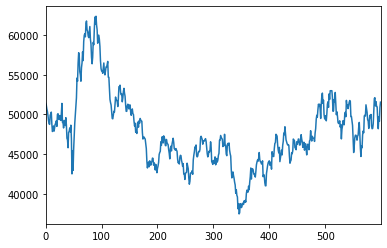

In [15]:
df_data['현재가'].astype(int).plot()

In [22]:
params = {"종목코드": code, "기준일자": "20171219", "수정주가구분" : "1"}
data2 = feeder.request(trCode="OPT10081", **params)

2020-06-02 16:18:05.277200  commRqData 주식일봉차트조회요청
{'BASC_DT': '2020-06-02',
 'EVENT': 'eventReceiveTrData',
 'REQUEST_NAME': '주식일봉차트조회요청',
 'TIME': '2020-06-02 16:18:05.719462',
 'TR_CODE': 'OPT10081'}


In [23]:
mul_data2 = data2['멀티데이터']
df_data2 = pd.DataFrame(mul_data2)

In [24]:
df_data2[df_data2['수정주가구분'] != '']

,종목코드,현재가,거래량,거래대금,일자,체결시간,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
116,,2397000,166131,399659,20170629,,2402000,2416000,2397000,4,0.00,,,,,
176,,2099000,164080,344971,20170330,,2094000,2122000,2094000,4,0.00,,,,,
363,,1396000,210541,295399,20160629,,1408000,1412000,1391000,4,0.00,,,,,


In [25]:
mul_data2 = data2['멀티데이터']
df_data2 = pd.DataFrame(mul_data2)
df_data2 = df_data2[cols]

In [26]:
df_data2 = df_data2.astype(int)

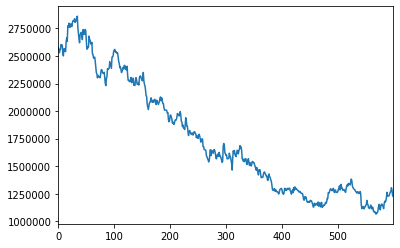

In [27]:
df_data2['현재가'].plot()

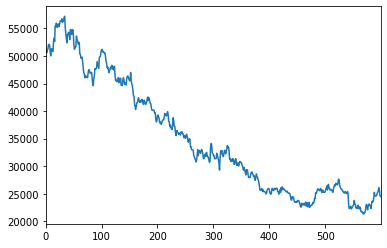

In [31]:
(df_data2['현재가']/100*2).plot()

In [40]:
df_data2['현재가'][:5]/100*2

0    51560.0
1    51200.0
2    50620.0
3    51060.0
4    51320.0
Name: 현재가, dtype: float64

In [37]:
df_data['현재가'].astype(int)[-5:]

595    48200
596    49700
597    49140
598    50880
599    51560
Name: 현재가, dtype: int32